### Final Exam

For the final exam you will implement the "Gini Improvement" algorithm for decision trees.

Remember that at each node, a decision tree choses a feature $k$ and a threshold $t_k$.  In a typical case it then creates a left child and a right child, which in turn select features $k$ and thresholds $t_k$ on which to split.  

Gini gain is the metric by which a node in a decision tree decides on $k$ and $t_k$. 

You might want to review decision trees in the DecisionTrees folder (this should exist on your project).

The following should be in your notes but I'll repeat it for convenience:

---

A **probability distribution** (for the purposes of this assignment) is a vector $[p_1,p_2,\ldots,p_N]$ such that $\sum_{i=1}^N p_i = 1$ and $p_i \geq 0$ for all $i=1,2,\ldots,N$. 

Any vector $\bar{y}$ of target classes in a classification problem determines a probability distribution $[p_1,p_2,\ldots,p_C]$ where $C$ is the number of classes and $p_i = \frac{\#\{j:y_j = i\}}{\# \bar{y}}$.  In other words $p_i$ is the proportion of points in the dataset that have target class $i$. 

The **Gini impurity** of a probability distribution $[p_1,p_2,\ldots,p_N]$ is $G = 1 - \sum_{i=1}^N {p_i}^2$

The **Gini Gain** of making a node split based on `X[:,k] < t_k` is given by the expression

$$ \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

where $G_{left}$ and $G_{right}$ are the Gini impurity of the probability distributions that result from the classes that apply to the left and right side of the split, respectively. The numbers $m_{left}$ and $m_{right}$ are the number of training examples that end up on the left or right side respectively, and $m$ is the number of examples which reach the current node in the tree.

For example in the iris data example in dt.ipynb (from the DecisionTrees folder) at the root node, $k=0$, $t_k = 2.45$, $G_{left} = 0$, and $G_{right} = 0.5$.  The Gini gain from this first split is $50/150\cdot 0 + 100/150 \cdot 0.5 = 1/3$.

Try to compute the Gini gain for the split at the white node in the first layer to make sure you understand the process.  The answer is 0.1105. 

---

We are going to implement the algorithm described above.  First we'll create some moons data.



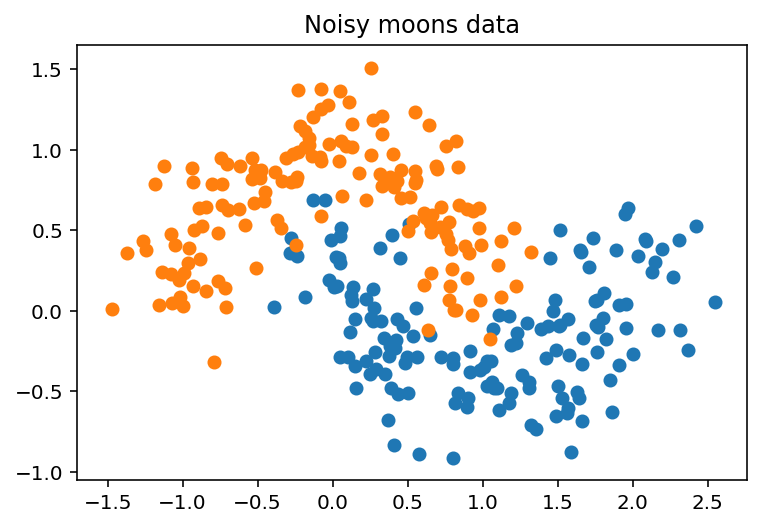

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np

X,y = make_moons(n_samples=300, shuffle=True, noise=.20, random_state=42)

plt.scatter(X[:,0][y==1],X[:,1][y==1])
plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.title("Noisy moons data")
plt.show()

### Part 1 (only part)

Your job is to fill in the functions described below.  

In [2]:

def distribution(y):
    """This function takes as input a target vector y.  It returns the probability distribution of classes (as described above).  That is, it returns a numpy array of real numbers [p0,p1,etc] such that p0 is the proportion of instances of class 0 in y, p1 is the proportion of instances of class 1 in y, etc."""
    distribution = []
    count = 0
    #print(y)
    for val in set(y):
        #Just figured out that set finds the unique values
        for i in y:
            if i == val:
                count += 1
        distribution.append(count/len(y))
        count = 0
    #print("returning", distribution)
    return distribution
    
def gini_impurity(distribution):
    """This function takes as input a probability distribution represented as a numpy array of real numbers (as described above).  It returns the Gini impurity of the distribution (as defined above)."""
    g = [] # create a set to hold the sums
    
    for i in range(0,len(distribution)): # iterate over distribution and append dist[i]**2
        g.append(distribution[i]**2)

    G = 0 # to get the sum

    for val in g:
        G += g[val]

    G = 1 - G
    return G

def gini_gain(X,y,k,t_k):
    """This function takes as input data X,y a feature column k, and a threshold t_k.  It returns the Gini Gain (as defined above) which results from splitting on feature k with threshold t_k."""
    #The Gini Gain of making a node split based on X[:,k] < t_k is given by the expression
    # ((mleft / m) * gleft) + ((mright/m) * gright)
    left = X[:,k] < t_k
    gleft = distribution(y[left])
    gright = distribution(y[~left])
    mleft = len(left)
    mright = len(~left)
    m = mleft+mright
    #print(m)
    #if list is empty, append 0 to complete the multiplication
    if not gleft:
        gleft.append(0)
    if not gright:
        gright.append(0)
    #iterate over list to add the values to get Ggain
    Ggainleft = 0
    Ggainright = 0
    #for i in range(0,len(gleft)):
        #Ggainleft += gleft[i]
    #for i in range(0,len(gright)):
        #Ggainright += gright[i]
    #print("gleft",gleft,"gright",gright)
    #print("ggainleft",Ggainleft,"ggainright",Ggainright)
    Ggain = 0
    if (len(gleft) > 1):
        for i in range(0,len(gleft)):
            Ggainleft += (mleft/m)*gleft[i]
        Ggain = Ggainleft + (mright/m)*gright[-1]
    if(len(gright)>1):
        for i in range(0,len(gright)):
            Ggainright += (mright/m)*gright[i]
        Ggain = (mleft/m)*gleft[-1] + Ggainright
    #Ggain = ((mleft/m)*gleft[-1]) + ((mright/m)*gright[-1])
    #Ggainzero = ((mleft/m)*gleft[0]) + ((mright/m)*gright[0])
    return Ggain
    assert(0 <= k < X.shape[1])


### Testing

The following code is to test your code.  The resulting pictures show you what thresholds should be found by the `find_best_tk` function defined below, assuming your code works. 



In [3]:
distribution(y)

[0.5, 0.5]

In [4]:
def find_best_tk(X,y):
    
    """Find and return the best combination of k and t_k for the dataset X,y with respect to Gini gain."""
    best = 1
    best_combo = []
    for k in range(X.shape[1]):
        for t_k in np.linspace(np.min(X[:,k]),np.max(X[:,k]),50):
            current = gini_gain(X,y,k,t_k)
            if current < best:
                best = current
                best_combo = [k,t_k]
    return best,best_combo

best, best_combo = find_best_tk(X,y)
print(best,best_combo)            

0.5 [0, -1.4725023343846568]


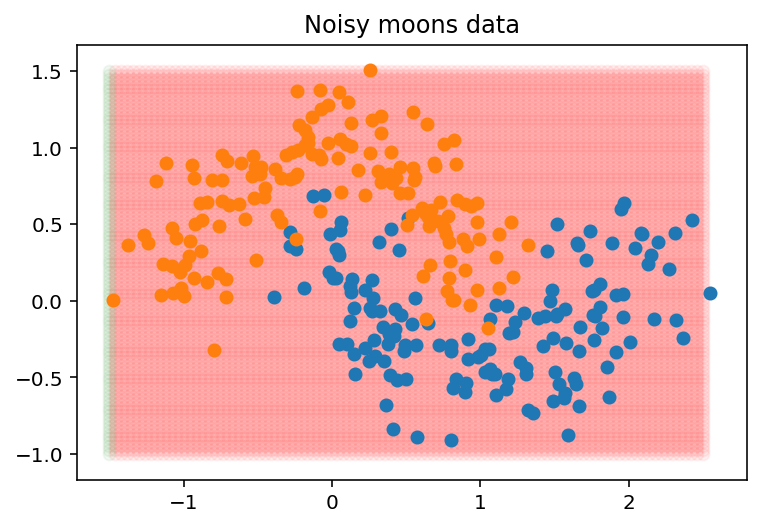

In [5]:
def plot_decision_boundary(k,t_k,xmin=-1.5,xmax=2.5,ymin=-1,ymax=1.5,resolution=100):
    num = 100
    xc = np.linspace(xmin,xmax,num)
    yc = np.linspace(ymin,ymax,num)
    cart_prod = np.transpose([np.tile(yc, len(xc)), np.repeat(xc, len(yc))])
    Xc = np.c_[cart_prod[:,1],cart_prod[:,0]]
    g = Xc[:,k] < t_k
    says_yeah = g == 1
    says_no = ~says_yeah

    plt.title("Decision boundary")

    plt.scatter(Xc[says_yeah][:,0],Xc[says_yeah][:,1],alpha=0.05,color='g')
    plt.scatter(Xc[says_no][:,0],Xc[says_no][:,1],alpha=0.05,color='r')

    
plot_decision_boundary(best_combo[0],best_combo[1])

plt.scatter(X[:,0][y==1],X[:,1][y==1])
plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.title("Noisy moons data")
plt.show()


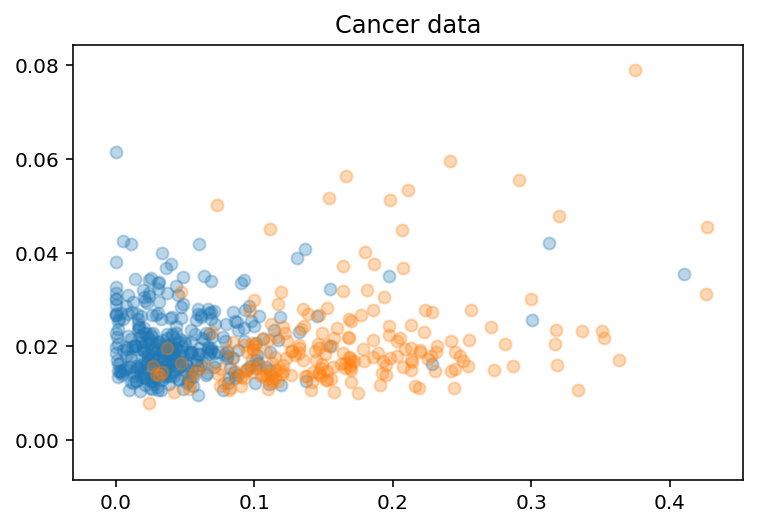

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = np.c_[cancer.data[:,6],cancer.data[:,18]]
y = cancer.target

plt.scatter(X[:,0][y==1],X[:,1][y==1],alpha=0.3)
plt.scatter(X[:,0][y==0],X[:,1][y==0],alpha=0.3)
plt.title("Cancer data")
plt.show()

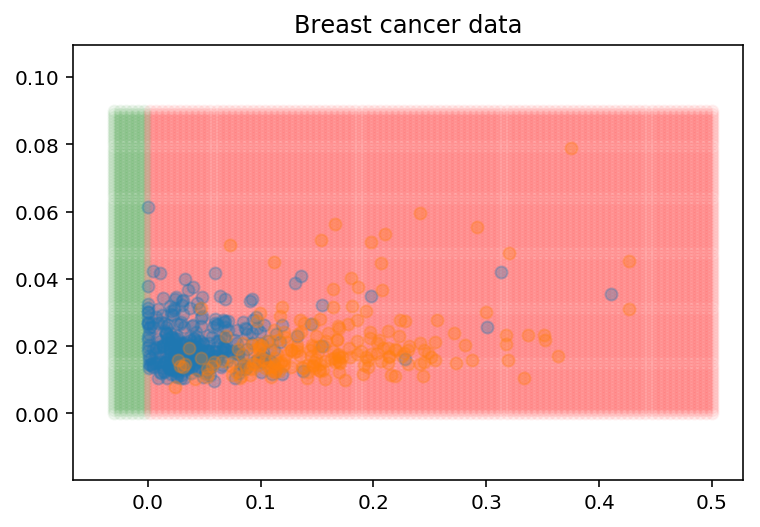

In [7]:
best, best_combo = find_best_tk(X,y)
plot_decision_boundary(best_combo[0],best_combo[1],-0.03,0.5,0,0.09)

plt.scatter(X[:,0][y==1],X[:,1][y==1],alpha=0.3)
plt.scatter(X[:,0][y==0],X[:,1][y==0],alpha=0.3)
plt.title("Breast cancer data")
plt.show()